In [89]:
import pandas as pd
import numpy as np


In [90]:
# Read the CSV file into a DataFrame
df = pd.read_csv('F:\\prepinsta\\week3\\Week 3 - Data Cleaning (Pandas) - 1\\Data-cleaning-for-beginners-using-pandas.csv')

In [91]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

In [92]:
# Display the count of missing values for each column
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
Index          0
Age            7
Salary         0
Rating         1
Location       0
Established    0
Easy Apply     0
dtype: int64


In [93]:
# Imputation example
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Location'].fillna(df['Location'].mode()[0], inplace=True)

In [94]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
Index          0
Age            0
Salary         0
Rating         1
Location       0
Established    0
Easy Apply     0
dtype: int64


In [95]:
# Imputation for 'Rating' column using mean
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

In [96]:
# Display the data types of each column
print("Data Types of Each Column:")
print(df.dtypes)


Data Types of Each Column:
Index            int64
Age            float64
Salary          object
Rating         float64
Location        object
Established      int64
Easy Apply      object
dtype: object


In [97]:
# Extract numerical values from salary ranges and calculate the average
df['Salary'] = df['Salary'].str.extract(r'(\d+)-(\d+)').astype(float).mean(axis=1)

# Convert 'Location' to a categorical type
df['Location'] = pd.Categorical(df['Location'])

# Convert 'Easy Apply' to boolean
df['Easy Apply'] = df['Easy Apply'].astype(bool)

# Display the updated data types
print("Updated Data Types of Each Column:")
print(df.dtypes)


Updated Data Types of Each Column:
Index             int64
Age             float64
Salary          float64
Rating          float64
Location       category
Established       int64
Easy Apply         bool
dtype: object


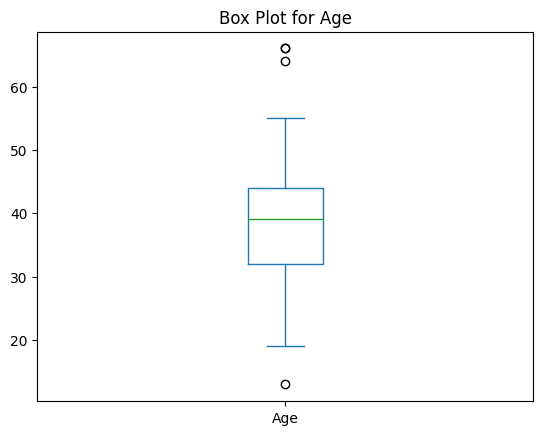

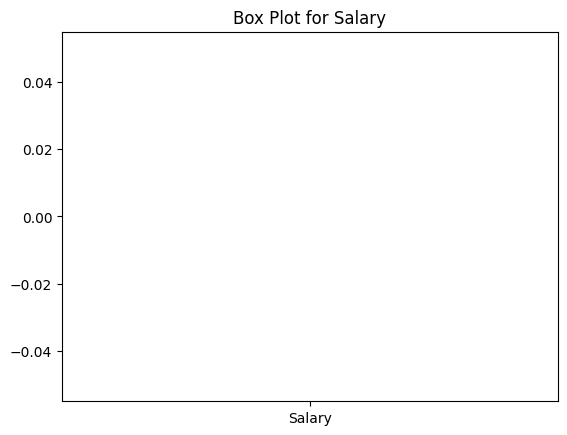

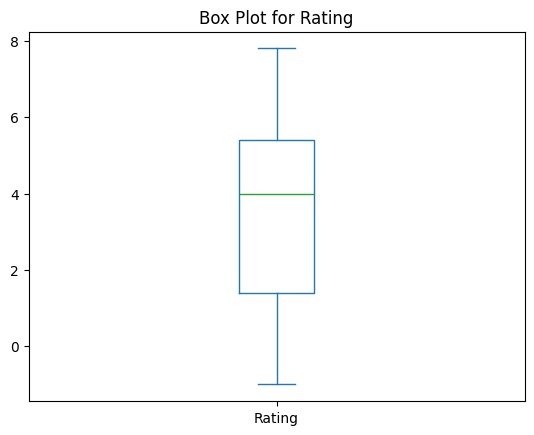

In [98]:
import matplotlib.pyplot as plt

# Box plot for Age
df['Age'].plot(kind='box')
plt.title('Box Plot for Age')
plt.show()

# Box plot for Salary
df['Salary'].plot(kind='box')
plt.title('Box Plot for Salary')
plt.show()

# Box plot for Rating
df['Rating'].plot(kind='box')
plt.title('Box Plot for Rating')
plt.show()


In [99]:
from scipy.stats import zscore

# Calculate Z-scores for Age, Salary, and Rating
z_scores = zscore(df[['Age', 'Salary', 'Rating']])

# Identify outliers using a threshold (e.g., Z-score > 3 or Z-score < -3)
outliers = (z_scores > 3) | (z_scores < -3)

# Display rows with outliers
outliers_rows = df[outliers.any(axis=1)]
print("Rows with Outliers:")
print(outliers_rows)


Rows with Outliers:
Empty DataFrame
Columns: [Index, Age, Salary, Rating, Location, Established, Easy Apply]
Index: []


This code explicitly converts the 'Salary' column to a numeric format.
 The errors='coerce' parameter will replace any non-numeric entries with NaN.

In [100]:
# Convert 'Salary' to numeric
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

In [101]:
# Display the updated 'Salary' column
print(df['Salary'])
# Display the data types of each column
print("Updated Data Types of Each Column:")
print(df.dtypes)


0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
Name: Salary, dtype: float64
Updated Data Types of Each Column:
Index             int64
Age             float64
Salary          float64
Rating          float64
Location       category
Established       int64
Easy Apply         bool
dtype: object


In [102]:
import pandas as pd

# Convert Location entries to lowercase
df['Location'] = df['Location'].str.lower()

# Standardize delimiters (using "," in this case)
df['Location'] = df['Location'].str.replace(' ', ',')
df['Location'] = df['Location'].str.replace(',,', ',')

# Standardize abbreviations
df['Location'] = df['Location'].str.replace('ny', 'NY')
df['Location'] = df['Location'].str.replace('aus', 'AUS')
# Add more abbreviation standardization as needed

# Print unique values to verify consistency
print(df['Location'].unique())


['india,in' 'new,york,NY' 'AUStralia,AUS']


In [105]:
import pandas as pd

# Assuming df is your DataFrame
# Check for missing values
missing_values = df['Established'].isnull().sum()
print(f"Missing values in 'Established' column: {missing_values}")

# Check data type
print(f"Data type of 'Established' column: {df['Established'].dtype}")

# Check for outliers or anomalies
anomalies = df[(df['Established'] < 0) | (df['Established'] > 2023)]
print("Rows with anomalous 'Established' values:")
print(anomalies[['Index', 'Established']])

# Check consistency with the year range (assuming a realistic range)
year_range = (1800, 2023)
inconsistent_years = df[(df['Established'] < year_range[0]) | (df['Established'] > year_range[1])]
print("Rows with inconsistent 'Established' values in terms of the year range:")
print(inconsistent_years[['Index', 'Established']])


Missing values in 'Established' column: 0
Data type of 'Established' column: float64
Rows with anomalous 'Established' values:
Empty DataFrame
Columns: [Index, Established]
Index: []
Rows with inconsistent 'Established' values in terms of the year range:
Empty DataFrame
Columns: [Index, Established]
Index: []


In [104]:
import numpy as np

# Assuming df is your DataFrame

# Remove or replace anomalous values
df['Established'] = np.where(df['Established'] < 0, np.nan, df['Established'])

# Impute missing values (if any) with the median of the column
median_established = df['Established'].median()
df['Established'].fillna(median_established, inplace=True)

# Print the modified DataFrame
print(df)


    Index        Age  Salary    Rating       Location  Established  Easy Apply
0       0  44.000000     NaN  5.400000       india,in       1999.0        True
1       1  66.000000     NaN  3.500000    new,york,NY       2002.0        True
2       2  39.045455     NaN -1.000000    new,york,NY       1988.0        True
3       3  64.000000     NaN  4.400000       india,in       1988.0        True
4       4  25.000000     NaN  6.400000  AUStralia,AUS       2002.0        True
5       5  44.000000     NaN  1.400000       india,in       1999.0        True
6       6  21.000000     NaN  0.000000    new,york,NY       1988.0        True
7       7  44.000000     NaN -1.000000  AUStralia,AUS       1988.0        True
8       8  35.000000     NaN  5.400000    new,york,NY       1988.0        True
9       9  22.000000     NaN  7.700000       india,in       1988.0        True
10     10  55.000000     NaN  5.400000       india,in       2008.0        True
11     11  44.000000     NaN  6.700000       india,i

In [106]:
unique_values = df['Easy Apply'].unique()
print("Unique values in 'Easy Apply' column:", unique_values)


Unique values in 'Easy Apply' column: [ True]


Descriptive Statistics for 'Rating':
 count    29.000000
mean      3.528571
std       2.774225
min      -1.000000
25%       1.400000
50%       4.000000
75%       5.400000
max       7.800000
Name: Rating, dtype: float64

Unique Values in 'Rating':
 [ 5.4         3.5        -1.          4.4         6.4         1.4
  0.          7.7         6.7         4.          3.          4.5
  5.3         3.3         5.7         5.          7.8         2.4
  3.52857143  3.4       ]


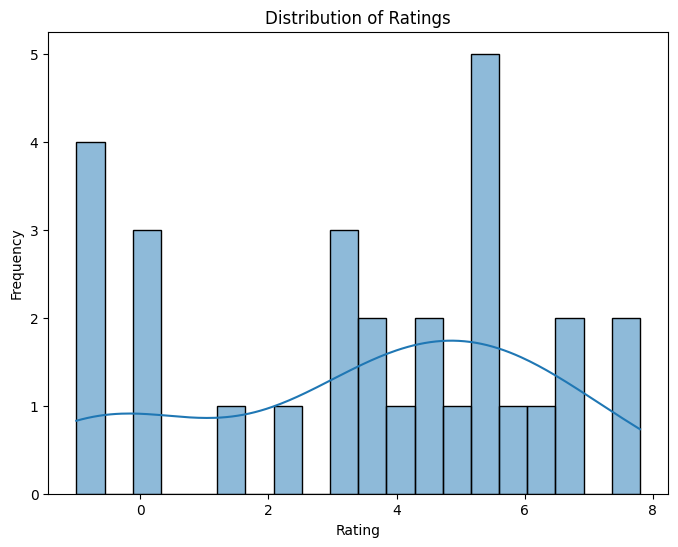

In [107]:
# Assuming df is your DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

# Check descriptive statistics
rating_stats = df['Rating'].describe()

# Explore unique values
unique_ratings = df['Rating'].unique()

# Print statistics and unique values
print("Descriptive Statistics for 'Rating':\n", rating_stats)
print("\nUnique Values in 'Rating':\n", unique_ratings)

# Visual inspection with a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [108]:
# Assuming df is your DataFrame

# Handling Negative Ratings
df['Rating'] = df['Rating'].apply(lambda x: np.nan if x < 0 else x)

# Handling Zero Ratings
df['Rating'] = df['Rating'].replace(0, np.nan)

# Handling Outliers (capping at 5)
max_rating = 5
df['Rating'] = df['Rating'].apply(lambda x: max_rating if x > max_rating else x)

# Print the modified DataFrame
print(df)


    Index        Age  Salary    Rating       Location  Established  Easy Apply
0       0  44.000000     NaN  5.000000       india,in       1999.0        True
1       1  66.000000     NaN  3.500000    new,york,NY       2002.0        True
2       2  39.045455     NaN       NaN    new,york,NY       1988.0        True
3       3  64.000000     NaN  4.400000       india,in       1988.0        True
4       4  25.000000     NaN  5.000000  AUStralia,AUS       2002.0        True
5       5  44.000000     NaN  1.400000       india,in       1999.0        True
6       6  21.000000     NaN       NaN    new,york,NY       1988.0        True
7       7  44.000000     NaN       NaN  AUStralia,AUS       1988.0        True
8       8  35.000000     NaN  5.000000    new,york,NY       1988.0        True
9       9  22.000000     NaN  5.000000       india,in       1988.0        True
10     10  55.000000     NaN  5.000000       india,in       2008.0        True
11     11  44.000000     NaN  5.000000       india,i

Descriptive Statistics for 'Rating':
 count    22.000000
mean      4.246753
std       1.039980
min       1.400000
25%       3.507143
50%       5.000000
75%       5.000000
max       5.000000
Name: Rating, dtype: float64

Unique Values in 'Rating':
 [5.         3.5               nan 4.4        1.4        4.
 3.         4.5        3.3        2.4        3.52857143 3.4       ]


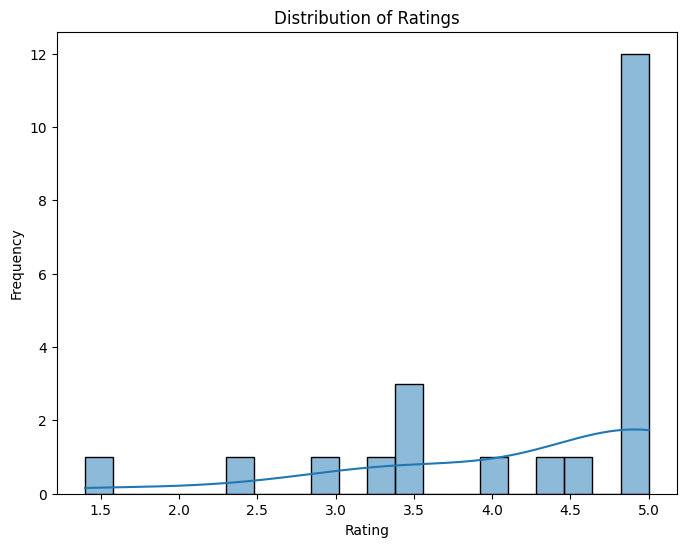

In [109]:
# Assuming df is your DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

# Check descriptive statistics
rating_stats = df['Rating'].describe()

# Explore unique values
unique_ratings = df['Rating'].unique()

# Print statistics and unique values
print("Descriptive Statistics for 'Rating':\n", rating_stats)
print("\nUnique Values in 'Rating':\n", unique_ratings)

# Visual inspection with a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


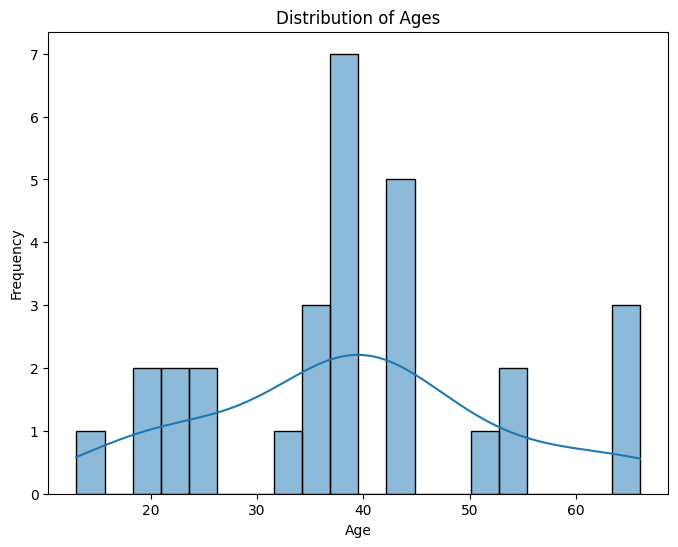

Descriptive Statistics for 'Age':
 count    29.000000
mean     39.045455
std      13.973131
min      13.000000
25%      32.000000
50%      39.045455
75%      44.000000
max      66.000000
Name: Age, dtype: float64


In [110]:
# Assuming df is your DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

# Check descriptive statistics
age_stats = df['Age'].describe()

# Visual inspection with a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Print descriptive statistics
print("Descriptive Statistics for 'Age':\n", age_stats)


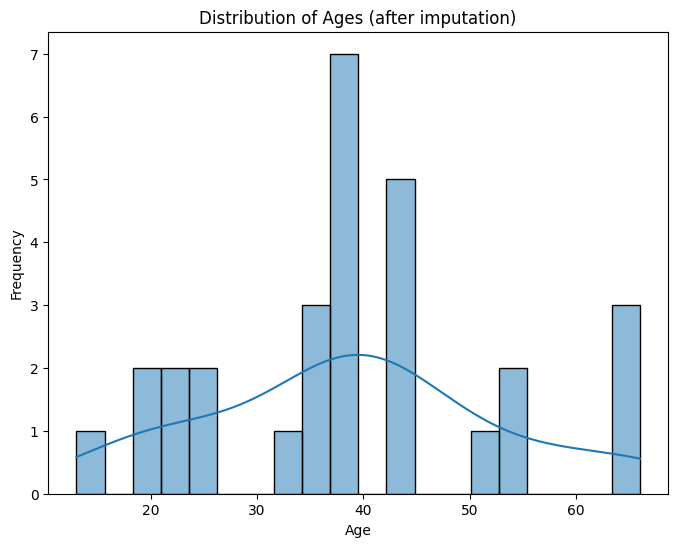

Descriptive Statistics for 'Age' (after imputation):
 count    29.000000
mean     39.045455
std      13.973131
min      13.000000
25%      32.000000
50%      39.045455
75%      44.000000
max      66.000000
Name: Age, dtype: float64


In [111]:
# Impute NaN values with the median of the 'Age' column
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# Visual inspection with a histogram after imputation
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Ages (after imputation)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Print modified descriptive statistics
print("Descriptive Statistics for 'Age' (after imputation):\n", df['Age'].describe())


In [113]:
# Assuming df is your DataFrame
# Check for inconsistencies between 'Established' and 'Age'
inconsistent_entries = df[df['Established'] != df['Age']]

# Print rows with inconsistencies
print("Rows with inconsistencies between 'Established' and 'Age':\n", inconsistent_entries)


Rows with inconsistencies between 'Established' and 'Age':
     Index        Age  Salary    Rating       Location  Established  Easy Apply
0       0  44.000000     NaN  5.000000       india,in       1999.0        True
1       1  66.000000     NaN  3.500000    new,york,NY       2002.0        True
2       2  39.045455     NaN       NaN    new,york,NY       1988.0        True
3       3  64.000000     NaN  4.400000       india,in       1988.0        True
4       4  25.000000     NaN  5.000000  AUStralia,AUS       2002.0        True
5       5  44.000000     NaN  1.400000       india,in       1999.0        True
6       6  21.000000     NaN       NaN    new,york,NY       1988.0        True
7       7  44.000000     NaN       NaN  AUStralia,AUS       1988.0        True
8       8  35.000000     NaN  5.000000    new,york,NY       1988.0        True
9       9  22.000000     NaN  5.000000       india,in       1988.0        True
10     10  55.000000     NaN  5.000000       india,in       2008.0     

In [112]:

unique_locations = df['Location'].unique()

# Print unique values
print("Unique Values in 'Location':\n", unique_locations)


Unique Values in 'Location':
 ['india,in' 'new,york,NY' 'AUStralia,AUS']
